# **Trustworthy Machine Learning - XAI homework**
 **Winter Semester 2023-2024, University of Tübingen**


---
**Group number**: Aldebaran

**Student names**:
- Bora KARGI
- Karahan SARITAŞ
- Kıvanç TEZÖREN

---
**The deadline for this homework is on 10/12/2023 at 23:59.**

---

#### **Submission**
Follow the below four steps.

(1) Copy this colab file to your local gdrive;

`File > Save a copy in Drive`

(2) Work on the solution on your local copy;

(3) Pin the version for submission in history;

`Click on "All changes saved" or "Last saved at XX:XX AM/PM" next to the drop-down menus at the top > Select version to submit > Click on three vertical dots (vertical ellipsis) > Rename > Write "Submission" `

(4) Share your local colab with `stai.there@gmail.com` before the deadline.

`Click on "Share" at the top-right corner > Put stai.there@gmail.com in "Add people and groups" > Give the "Viewer" right and tick on "Notify people" > Click send.`

Note that we are able to see the edit history with time stamps, so please ensure that you stop working on your notebook before the deadline. Don't forget to indicate your group number and names.

---
#### **Structure**
This homework is structured in 3 topics. Each topic corresponds the content of a separate lecture. Therefore it makes sense to start working on each topic after attending the corresponding lecture. The recommended starting dates are indicated in the section headers, but feel free to explore by yourself too.


For this homework, you also require some external python files and model checkpoints that are available [here](https://drive.google.com/drive/folders/11ZC12Xn-Tw3RWtoREQUcqo1pPgTBtXUS?usp=sharing). Make sure to download them to your drive and update the paths for import according throughout the notebook. **Do not use any other external libraries than the ones already defined in the notebook or consult the TML lecture staff first about usage.**

If you have any questions about the homework, feel free to drop us a message on Discord or come to the tutorials on Monday at 10:00. The lead tutor for this homework is [Evgenii](https://scalabletrustworthyai.github.io/member/evgenii/).

## **1. Introduction to explainability** (10+10+10=30 pts)
Recommended start: 13/11/2023

### 1.1 XAI taxonomy (10 pts)
Explain the taxonomies of explainable AI methods. What does each category mean? Comment on the compatibility of the taxonomies. Give examples and cite relevant work.

**Taxonomy 1**

<img alt="XAI taxonomy" src="https://raw.githubusercontent.com/kortukov/tml_utils/main/taxonomy_1.png" width=800>


<font size=2>(Image source: Adadi and Berrada (2018), TYPO: Scoop = Scope)</font>


**Taxonomy 2**

<img alt="XAI problem taxonomy" src="https://www.researchgate.net/profile/Carla-Vieira-16/publication/341643347/figure/fig2/AS:895404656848907@1590492514543/Open-the-black-box-problems-taxonomy-Guidotti-et-al-2018.ppm" width=800>

<font size=2>(Image source: Guidotti et al. (2018))</font>

#### Taxonomy 1.
##### **Intrinstic vs Post-Hoc**

If a method is intrinsic, this means that the explainability method is limited to the model classes. Intrinsic interpretability is achieved by constructing self-explanatory models which incorporate interpretability directly to their structures [1]. So by definition, intrinsic models are model specific.

For example decision trees, by their nature of splitting after a decision, is intrinsicly interpretable. Linear models, where we can state all of the function as a $f_\theta(x) = w^Tx + b$ where $w$ is a weight vector and $b$ is a bias term, is another example of intrinsicly interpretable model since we can measure how changes in input affects the output easily. Since such models can be quite simple for advanced tasks, training performance becomes a tradeoff. Inherently interpretable models accurate and undistorted explanation
but may sacrifice prediction performance to some extent [1]. However using such simple self-explanatory models comes with the cost of potentially reduced ability to handle more complex, high-dimensional data effectively.

Post-hoc interpretability methods, both model-specific and model-agnostic, offer flexibility and detailed insights into complex models like neural networks which are too complex to be intrinsically interpretable, after they have been trained. As the name suggest, these methods are applied after training a model and thus do not impact performance in general.

One example of a model-specific post-hoc method is neural network interpretation methods. By their nature, neural networks get complicated and non-linear very quickly. Neural networks learn features and concepts in their hidden layers and we can examine the layers in depth to cover what has been learnt, which can be more computationally efficient than model-agnostic methods [2].

Examples of model-specific post-hoc interpretability methods for neural networks include DeepLIFT, GradShap, Integrated Gradients, KernelShap, DeepLiftShap, and Shapley Value Sampling. These methods are applied to architectures like CNNs, Bi-LSTMs, and Transformer neural networks [3]. For example DeepLIFT [4] (Deep Learning Important FeaTures), compares the activation of each neural network neuron to its 'reference activation' and assigns contribution scores based on the difference.

In contrast, model-agnostic methods are more flexible then the model-specific methods since it treats the model as a *black-box*, by only considering the inputs and the outputs. LIME (Local Interpretable Model-Agnostic Explanations) is a technique that explains the predictions of any classifier in an interpretable and faithful manner, by learning an interpretable model locally around the prediction. It creates a new dataset consisting of permuted samples and learns an interpretable model (like a decision tree) to approximate the predictions of the black box model [5].


##### **Local Scope vs Global Scope:**

Local interpretable approaches aim to answer the question, "Why and how did the model make this specific decision for this particular instance?" in order to provide an explanation for each of a model's individual predictions.

These techniques include LIME [5] and SHAP [7]. LIME understands the behavior of the model locally by perturbing the input data and observing the changes in the model predictions, as described in the *model-agnostic* post-hoc methods. The method known as SHAP (Shapley Additive Explanations) is grounded in game theory. The contribution of each characteristic to the prediction for a particular instance is quantified using the SHAP explanation approach.

Conversely, global interpretability models aim to comprehend the behavior of the model across each instances - which allows us to understand the decisions specific to each instance as well. So, it describes the average behavior of a machine learning model, and they are usually expressed as expected values based on the data distribution [2].

Partial dependence charts are one type of such technique (PDPs). PDP evaluates each case and provides an assertion regarding the overall correlation between a feature and the intended result. **Permutation feature importance algorithm** is another example of a globally interpretable technique.. The algorithm works by comparing the error between the original input and feature permutted input
A. Feature $j$ is permuted and the error is measured in each step. By dividing the dataset in half and switching the values of feature $j$, they make advantage of global information. Since measured feature importance is the increase in model error when a feature's information is lost, it offers a broad understanding of the behavior of the model. [7]

In summary, local method focuses on instance-specific predictions while global methods aim to achieve a generalized understanding of model's behaviour.

---

#### Taxonomy 2.
##### Black Box Explanation Problem
A black-box model is a model where only inputs and outputs are available to the user. Black-box explanation methods are the methods and techniques used to interpret and understand the internal workings of black-box models [8]. Guidotti _et al._ further categorizes the black-box explanation problem into three categories.

**Black Box Model Explanation** is defined as providing an interpretable and transparent model that can mimic the behavior fo a black box model.  The decision-making process of the black-box needs to be transparent in this model. Finding a function that can reproduce the black-box model's output in a way that makes it interpretable globally can be used to summarize the problem.

**Black Box Outcome Explanation** involves explaining individual predictions of a black box model. This approach focuses on clarifying why the model made a specific prediction for each instance, providing local interpretability. The goal of this approach is to provide clarity on why the model made a particular decision in individual cases. Unlike the model explanation, outcome explanation is locally interpretable.

**Black Box Model Inspection** consists in providing a representation for understanding how a black box model operates or why it makes certain predictions. Finding a function that produces a visual representation of the behaviour of black box summarizes this problem.

#### Transparent Box Design Problem
Transparent-box design is the creation and use of models that are inherently interpretable and transparent in their decision-making process. It is defined as a design where the model is locally or globally interpretable on its own [8].

Transparent-box design involves developing a learning function that takes the dataset and returns a locally or globally interpretable predictor which would imply the existence of a local or global explanator function that returns a human understandable explanation.

---

#### Compatibility
As explained, most of the terms can be expressed with each other.

Intrinsic explanations are the explanations provided by the models, so they are model-specific by definition. In contrast, posthoc methods, typically used for black-box models, can be model-agnostic, offering explanations after model training.

The black box model explanation tries to explain the model in an understandable way - which can be seen as a globally interpretable explanation. On the other hand, the Black box outcome explanation focuses on specific individual outcomes, which are defined under the locally interpretable methods.

Transparent box design uses intrinsically interpretable models, which can be locally or globally interpretable.

Lastly, the black box inspection problem is highly related to the post-hoc model-agnostic explanations as it tries to represent the behaviors visually.

---

##### References:

- [1] Mengnan Du, Ninghao Liu, Xia Hu: “Techniques for Interpretable Machine Learning”, 2018; <a href='http://arxiv.org/abs/1808.00033'>arXiv:1808.00033</a>
- [2] Molnar, C. (2022). Interpretable Machine Learning:
A Guide for Making Black Box Models Explainable (2nd ed.).
christophm.github.io/interpretable-ml-book/
- [3] Turbé, H., Bjelogrlic, M., Lovis, C. et al. Evaluation of post-hoc interpretability methods in time-series classification. Nat Mach Intell 5, 250–260 (2023). https://doi.org/10.1038/s42256-023-00620-w
- [4] Avanti Shrikumar, Peyton Greenside, Anshul Kundaje: “Learning Important Features Through Propagating Activation Differences”, 2017, PMLR 70:3145-3153, 2017; <a href='http://arxiv.org/abs/1704.02685'>arXiv:1704.02685</a>.
- [5] Marco Tulio Ribeiro, Sameer Singh, Carlos Guestrin: “"Why Should I Trust You?": Explaining the Predictions of Any Classifier”, 2016; <a href='http://arxiv.org/abs/1602.04938'>arXiv:1602.04938</a>.
- [6] Lundberg, Scott M., and Su-In Lee. “A unified approach to interpreting model predictions.” Advances in Neural Information Processing Systems (2017).↩︎
- [7] Fisher, Aaron, Cynthia Rudin, and Francesca Dominici. “All models are wrong, but many are useful: Learning a variable’s importance by studying an entire class of prediction models simultaneously.” http://arxiv.org/abs/1801.01489 (2018)
- [8] Riccardo Guidotti, Anna Monreale, Salvatore Ruggieri, Franco Turini, Dino Pedreschi, Fosca Giannotti: “A Survey Of Methods For Explaining Black Box Models”, 2018; <a href='http://arxiv.org/abs/1802.01933'>arXiv:1802.01933</a>.

### 1.2 "Good" explanations (10 pts)

State 3 aspects of good explanations and elaborate. Why are they important? How could they be evaluated (conceptual outline is sufficient)?


---

## Understandability
One, if not the best, aspect that makes an explanation "good" is the understandability of the explanation. Understandability, in this case, refers to "how easily an explanation can be understood by the intended audiences (humans)". An explanation must be understandable to be effective to be used in decision-making systems. Given a *lung cancer detection* system, if the doctors do not understand a classification model explanation about the detection of cancer, the system will not be trusted by the intended audiences. One way to evaluate whether an explanation is understandable is to ask the intended audience whether the explanation is interpretable or meaningful - and ask it to compare with human explanations if possible.

## Fidelity (Accuracy, Completeness)
A good explanation should respect the decision-making model it uses. Fidelity ensures that the explanation accurately represents the model's decision-making process. An accurate explanation would respect the internal process of a decision-making system. For example, given a *lung cancer detection* system, an explanation with high fidelity would ensure that the explanation is aligned with what a model computes. Explanations with low fidelity may lack information that some part of the input data significantly influenced the decision of the machine learning model. Since it guarantees that these explanations accurately reflect the model's decision-making process, fidelity in AI explanations is essential. In essence, fidelity ensures that explanations accurately reflect the AI's functioning and are both understandable. One way to evaluate fidelity would be deleting the important parts of the input data, as shown in the explanations. If the explanation represents the internal models accurately, that would mean that deleting the important explanations would have a high impact on the decision-making process, whereas deleting the unimportant parts would have no effect.

## Relevance
The notion of relevance holds significant importance in augmenting the efficacy of explanations. It guarantees that the data provided by an AI system, is directly relevant to the unique context and requirements of the user. This tailored approach makes the explanation not only informative but also practical and meaningful. For example, in a lung cancer detection system, a relevant explanation would clearly outline the key indicators identified by the AI, such as the size, shape, and density of nodules detected in a lung scan. Medical practitioners need this kind of targeted information because it directly links to their diagnostic procedures and helps them comprehend why the AI system identified a certain case as having a high risk of lung cancer. Clinicians can make better decisions and comprehend the AI's thought process with the help of explanations that are this relevant.


### 1.3 Explanation evaluation (10 pts)

Write a Python script for evaluating the correctness of a feature attribution explanation like saliency maps with a remove-and-classify approach. We remove groups of pixels instead of single pixels to save time.

We provide a pre-trained LeNet model on Fashion-MNIST (~90% test set accuracy) with some dummy feature attribution explanations below. Please use these to test your remove-and-classify function.

In [ ]:
# Mounting the drive to access the pre-trained model weights
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set up GPU use in case it is available
import torch
torch.manual_seed(2023)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
# Here we load the pre-trained model
import sys

sys.path.insert(0, '/content/drive/MyDrive/XAI')
from lenet import LeNet

lenet = torch.load("/content/drive/MyDrive/XAI/lenet_fashionmnist.pckl", map_location=device)
lenet.eval()

LeNet(
  (conv1): Conv2d(1, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (linear1): Linear(in_features=6272, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
# Loading the dataset. Since the model is already trained, we only require the test set.
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Lambda(lambda x: x.squeeze())
                                ])

fmnist_test = datasets.FashionMNIST(root='./data_FashionMNIST',
                                train=False,
                                download=True,
                                transform=transform
                                )

100%|██████████| 26421880/26421880 [00:01<00:00, 13290273.44it/s]


Extracting ./data_FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data_FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 209361.24it/s]


Extracting ./data_FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data_FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3902153.95it/s]


Extracting ./data_FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data_FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 24818709.19it/s]

Extracting ./data_FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data_FashionMNIST/FashionMNIST/raw



In [ ]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/XAI')
from xai_utils import model_accuracy

fmnist_accuracy = model_accuracy(lenet, fmnist_test)
assert fmnist_accuracy == 0.9
print(f'Accuracy on the test set: {fmnist_accuracy:.3f}')

Accuracy on the test set: 0.900


**Your turn! Fill in the function to evaluate how well the dummy gaussian maps explain the model predictions.**

In [ ]:
from sklearn.metrics import auc
import torch
from tqdm import tqdm
import numpy as np

# This is a tip, you don't have to split up the code into two functions.
# Having them separate makes your code more readable.
def sort_expl_by_importance(explanations):
    """For each feature map in the explanations list, returns the indices
    that would sort the pixels according to the attribution.

    :param explanations: list of feature attribution maps
    :returns: list of explanation ranks
    """
    all_indices = []
    #### >>>> PUT YOUR SOLUTION HERE <<<<
    def unravel_index(indices, shape):
      coord = []
      for dim in reversed(shape):
          coord.append(indices % dim)
          indices = indices // dim
      coord = torch.stack(coord[::-1], dim=-1)
      return coord

    for i in range(len(explanations)):  # for each map
        flat = explanations[i].flatten()
        flat_tensor = torch.tensor(flat) if not torch.is_tensor(flat) else flat
        indices = torch.argsort(flat_tensor, descending=True)    # indices[0] = max
        indices = unravel_index(indices, explanations[i].shape)  # indices[i] = (array of x coordinates, array of y coordinates)
        all_indices.append(indices)                              # all_indices = list of tuples

    #### >>>> END OF YOUR SOLUTION <<<<
    return all_indices


def remove_and_classify(model, dataset, explanations, k=100):
    """Main remove and classify function. Iteratively removes top k features
    from all instances in the dataset and measures model performance.
    Returns the list of model performance.
    :param model: Model to explain
    :param dataset: Image data
    :param explanations: list of explanations corresponding to the dataset
    :param k: number of features to remove at once, initialized at 100
    :returns: list of model accuracy at removal of k features.
    """
    # input check
    assert len(dataset) == len(explanations)
    assert dataset.data.shape[-2:] == explanations[0].shape

    sorted_attribution_indices = sort_expl_by_importance(explanations)
    performances = []
    # Unifying processing across two datasets (for Tasks 1 and 2).
    data_shape = dataset[0][0].shape
    if len(data_shape) == 2: # fmnist data
        width, height = data_shape
        total_num_features = explanations[0].size
        data_iterable = dataset.data
        # Access the fmnist data as data_iterable[index][row, column]
    elif len(data_shape) == 3: # cub data
        channels, width, height = data_shape
        total_num_features = explanations[0].numel()
        data_iterable = dataset
        # Access the cub data as data_iterable[index][0][channel, row, column]
        # We advise you to implement feature removal in-place. This is not
        # good coding practice, but otherwise you might run out of RAM.

    #### >>>> PUT YOUR SOLUTION HERE <<<<

    npixels = width * height
    for i in tqdm(range(0, npixels, k)):
      indices_to_remove = [sorted_attribution_indices[index][i:i+k] for index in range(len(explanations))]  # len(explanations) many (k, 2) tensors
      for index in range(len(explanations)):
        row, col = indices_to_remove[index].T  # Extract rows and columns directly
        if len(data_shape) == 2:
          data_iterable[index][row, col] = 128
        else:
          data_iterable[index][0][0, row, col] = 0.485
          data_iterable[index][0][1, row, col] = 0.456
          data_iterable[index][0][2, row, col] = 0.406

      accuracy = model_accuracy(model, dataset)
      performances.append(accuracy)

    #### >>>> END OF YOUR SOLUTION <<<<

    return performances

Run your evaluation code on the test set with the dummy explanations and get the removal performances.
This takes about 1-3 minutes, depending on the GPU you were assigned.

In [ ]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/XAI')
from xai_utils import centered_gaussian

explanations = [centered_gaussian(28,28)]*len(fmnist_test)

k = 100
removal_performances = remove_and_classify(lenet, fmnist_test, explanations, k)
removal_performances.insert(0, fmnist_accuracy) # in place, adding the original accuracy in front for AUC

100%|██████████| 8/8 [00:23<00:00,  2.89s/it]


The remove and classify score is  0.458


Text(0.5, 0, 'Feature removal step (k=100)')

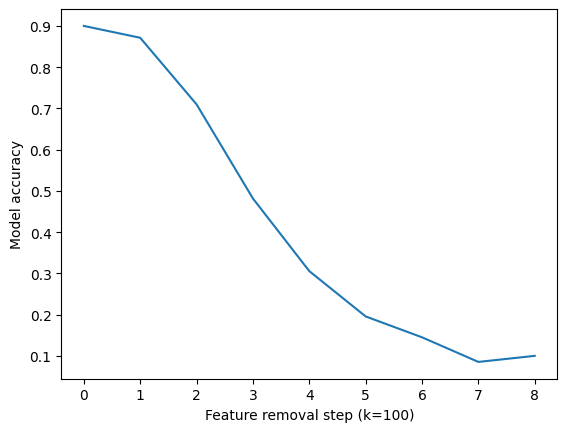

In [ ]:
# To get the remove-and-classify score, get the AUC of the plot and plot the removal performances for analysis
import matplotlib.pyplot as plt
rac_score = auc(range(len(removal_performances)), removal_performances)
rac_score_norm = rac_score / auc(range(len(removal_performances)), [fmnist_accuracy]*len(removal_performances))
print(f"The remove and classify score is {rac_score_norm: .3f}")

plt.plot(removal_performances)
plt.ylabel('Model accuracy')
plt.xlabel('Feature removal step (k=100)')

In [ ]:
# Clear the variables apart from those needed in Task 2.
%reset_selective -f "\b(?!remove_and_classify\b)(?!sort_expl_by_importance\b)\w+"

## **2. Explaining predictions with feature attribution** (20+5+10=35pts)
Recommended start: 20/11/2023

###2.1 CAM implementation (20pts)

In this exercise, you will implement the feature attribution explanation method [CAM by Zhou et al. (2016)](http://ieeexplore.ieee.org/document/7780688/) in PyTorch using an already pre-trained ResNet50 on the image classification task of CUB, which is often used in XAI. CUB is a bird classification dataset with 200 classes of bird species.

Additionally, you will also implement the vanilla gradient explanation method as a baseline to compare to.

We provide the model and model evaluation code below. Visualize your results with the provided method.


First, we load the dataset and the model. As this is not a standard PyTorch dataset, we added a bit of functionality to it for our experiments. Loading the dataset takes a bit (loading roughly 3 min).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/XAI')

from xai_utils import load_cub_test, model_accuracy, centered_gaussian

cub_test = load_cub_test()
num_classes = 200 # 200 Bird species in CUB dataset

100%|██████████| 1150585339/1150585339 [00:59<00:00, 19493606.09it/s]


#### Load pre-trained ResNet50 with changed architecture in the last layers

Then, we load the model. It is a ResNet50 model that is pre-trained on the CUB dataset.

**Important:** As mentioned during the lecture, there is an architectural change to the classic ResNet50 in the last layers in the provided model. Usually, a ResNet ends with a global average pooling layer before a dense layer, and then followed by a softmax. This is equivalent to changing the last layers to a 1x1 convolutional layer, global average pooling followed by softmax. With this architecture change, it is simpler to extract CAM.

In [ ]:
import torch
from torchvision import transforms
from google.colab import drive
drive.mount('/content/drive')

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/XAI')

from resnet50 import resnet50
resnet = resnet50(dataset_name='CUB',
                    pretrained=False,
                    num_classes=num_classes,
                    large_feature_map=False,
                    use_bn=True)

ckpt = torch.load("/content/drive/MyDrive/XAI/cam_cub_checkpoint.pth.tar")

resnet.load_state_dict(ckpt["state_dict"])
resnet.to(device)
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
cub_accuracy = model_accuracy(resnet, cub_test)
assert cub_accuracy == 0.798
print(f'Accuracy on the test set: {cub_accuracy:.3f}')

Accuracy on the test set: 0.798


Below, we provide the functions to show an image of the dataset and to visualize the feature attribution explanation as a heatmap overlay. Examples on how to use are also provided.

In [ ]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/XAI')
from xai_utils import show_sample, show_attribution_overlay

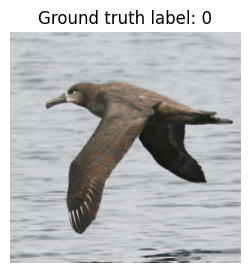

In [ ]:
# Example. Visualizing the first test image.
show_sample(dataset=cub_test, sample_idx=0)

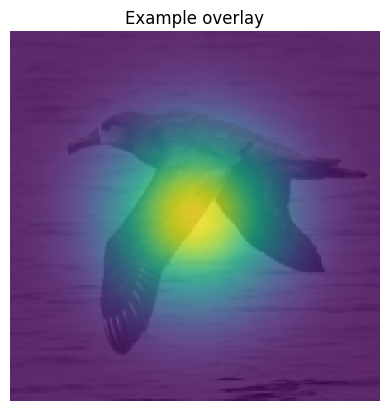

In [ ]:
# Example. Visualizing the gaussian baseline as an attribution explanation overlay.
show_attribution_overlay(dataset=cub_test,
                         sample_idx=0,
                         attribution_map=centered_gaussian(224,224),
                         title='Example overlay')


**Your turn! Write a function to extract CAM from the model to explain a certain prediction.**

Extract CAM from the ResNet50 model

In [ ]:
def class_activation_map(model, dataset, sample_idx):
    """Gets the class activation map of the predicted class as a feature attribution explanation from the last convolutional layer of adapted ResNet model.
    Originally from Zhou et al. (2016)

    :param model: Adapted ResNet model in with 1x1 convolution
    :param dataset: dataset containing the instance to be explained
    :param sample_idx: ID of the instance to be explained
    :returns: CAM of shape (224, 224) in case of CUB
    """
    # Tip: use the hook method to extract the activations of particular layers
    # Hook method below from https://discuss.pytorch.org/t/how-can-l-load-my-best-model-as-a-feature-extractor-evaluator/17254/6
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    image, _ = dataset[sample_idx]
    image = image.to(device)
    image = image.unsqueeze(0) # to get the batch size dimension

    #### >>>> PUT YOUR SOLUTION HERE <<<<
    # architecture: conv_last --> GAP (1x1 convolution followed by ReLU) --> softmax
    model.conv_last.register_forward_hook(get_activation('conv_last'))
    y_pred = model(image)

    y_pred_expanded = y_pred.unsqueeze(-1).unsqueeze(-1) # reshape
    cam = (activation['conv_last'] * y_pred_expanded).sum(dim=1, keepdim=True)  # CAMs
    cam = transforms.functional.resize(cam, (224, 224), antialias=True).squeeze().cpu().detach()

    #### >>>> END OF YOUR SOLUTION <<<<
    return cam

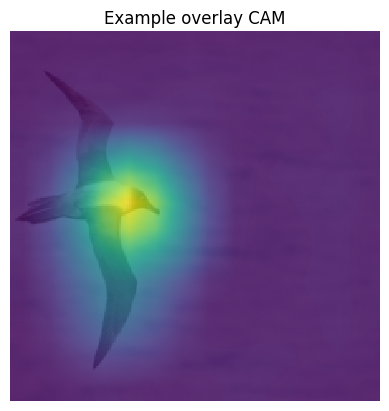

In [ ]:
cam = class_activation_map(resnet, cub_test, 12)

show_attribution_overlay(dataset=cub_test,
                         sample_idx=12,
                         attribution_map=cam.squeeze(),
                         title='Example overlay CAM')

**Your turn again! Write a function to get the saliency map from [Simonyan et al. (2013)](http://arxiv.org/abs/1312.6034) as a local explanation.**

In [ ]:
def saliency(model, dataset, sample_idx):
    """Computes the saliency map of the predicted class as a feature attribution explanation.
    From Simonyan et al. (2013)

    :param model: predictive model
    :param dataset: dataset containing the instance to be explained
    :param sample_idx: ID of the instance to be explained
    :returns: saliency map of shape (224, 224) in case of CUB
    """
    # Tip: Look at the assumptions for RGB images in the paper.
    image, _ = dataset[sample_idx]
    image = image.to(device)
    image = image.unsqueeze(0) # to get the batch size dimension
    #### >>>> PUT YOUR SOLUTION HERE <<<<

    image.requires_grad = True
    y_pred = model(image) # (1, 200)
    y_pred_max = torch.argmax(y_pred, dim=1) # c
    y_pred[0, y_pred_max].backward()
    grads = image.grad

    saliency = torch.max(grads.abs(), dim=1)[0] # maximum of absolute values over channels
    saliency = saliency.squeeze(0).cpu().detach()

    #### >>>> END OF YOUR SOLUTION <<<<
    return saliency

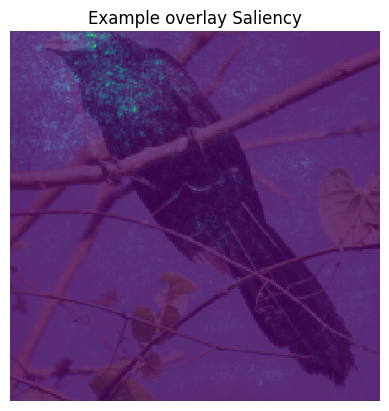

In [ ]:
saliency_attribution = saliency(resnet, cub_test, 15)

show_attribution_overlay(dataset=cub_test,
                         sample_idx=15,
                         attribution_map=saliency_attribution,
                         title='Example overlay Saliency')

###2.2 Evaluate CAM (5pts)
Evaluate the methods using the remove-and-classify approach from exercise 1.3 of this homework. To get the points, report the scores for all three methods below.

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt

def get_explanations(explanation_function, model, dataset):
    """Computes the explanations for the whole dataset specified in dataset

    :param explanation_function: python function that takes arguments model, dataset, idx
    :param model: model to be explained
    :param dataset: dataset to be used to explain the model
    """
    explanations = []
    for idx in tqdm(range(len(dataset))):
        e = explanation_function(model, dataset, idx)
        explanations.append(e)
    return explanations

In [ ]:
# First, get the explanations
cam_explanations = get_explanations(class_activation_map, resnet, cub_test)

100%|██████████| 6/6 [00:27<00:00,  4.53s/it]

The remove and classify score is  0.112


Text(0.5, 0, 'Feature removal step (k=10000)')

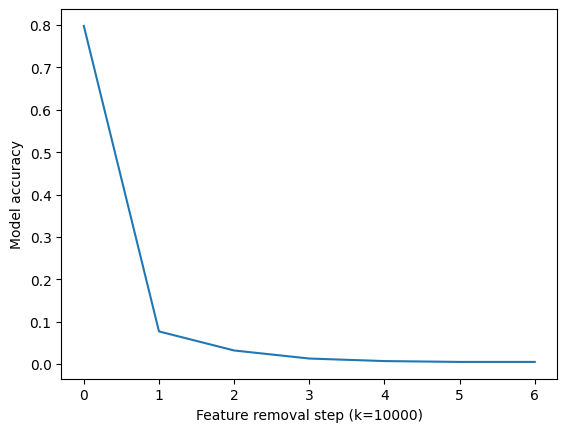

In [ ]:
# then remove-and-classify, this takes roughly 25 min depending on the GPU you got assigned from Colab
k = 10000
cam_removal_performances = remove_and_classify(resnet, cub_test, cam_explanations, k)
cam_removal_performances.insert(0, cub_accuracy)

# Inspect the results
rac_score = auc(range(len(cam_removal_performances)), cam_removal_performances)
rac_score_norm = rac_score / auc(range(len(cam_removal_performances)), [cub_accuracy]*len(cam_removal_performances))
print(f"The remove and classify score is {rac_score_norm: .3f}")

plt.plot(cam_removal_performances)
plt.ylabel('Model accuracy')
plt.xlabel('Feature removal step (k=10000)')

In [ ]:
# Free up RAM in colab
del globals()['cam_explanations']
del globals()['cam_removal_performances']
del globals()['cub_test']

100%|██████████| 6/6 [00:31<00:00,  5.18s/it]

The remove and classify score is  0.111


Text(0.5, 0, 'Feature removal step (k=10000)')

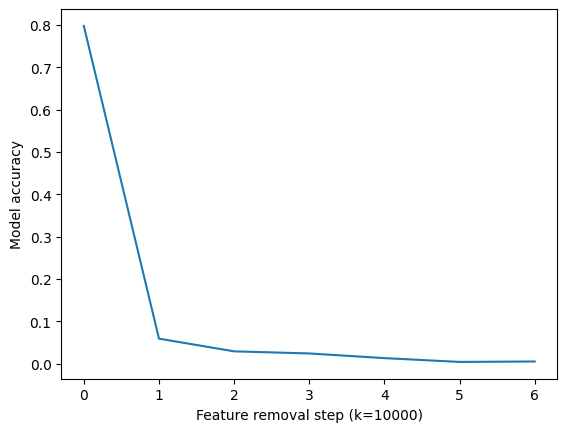

In [ ]:
# Evaluation of saliency
# Load test set again, as we removed features during evaluation.
cub_test = load_cub_test()

# First, get the explanations
saliency_explanations = get_explanations(saliency, resnet, cub_test)

# then remove-and-classify
k = 10000
saliency_removal_performances = remove_and_classify(resnet, cub_test, saliency_explanations, k)
saliency_removal_performances.insert(0, cub_accuracy)

# Inspect the results
rac_score = auc(range(len(saliency_removal_performances)), saliency_removal_performances)
rac_score_norm = rac_score / auc(range(len(saliency_removal_performances)), [cub_accuracy]*len(saliency_removal_performances))
print(f"The remove and classify score is {rac_score_norm: .3f}")

plt.plot(saliency_removal_performances)
plt.ylabel('Model accuracy')
plt.xlabel('Feature removal step (k=10000)')

In [ ]:
# Free up RAM in colab
del globals()['saliency_explanations']
del globals()['saliency_removal_performances']
del globals()['cub_test']

100%|██████████| 6/6 [00:30<00:00,  5.01s/it]

The remove and classify score is  0.215


Text(0.5, 0, 'Feature removal step (k=10000)')

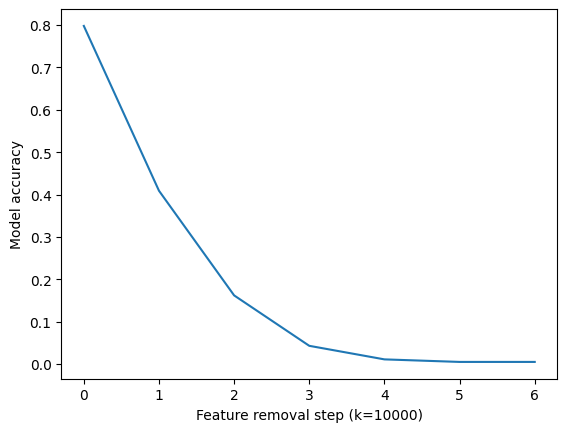

In [ ]:
# Evaluation of gaussian map baseline
cub_test = load_cub_test()
# First, get the explanations
baseline_explanations = [torch.Tensor(centered_gaussian(224,224))]*len(cub_test)

# then remove-and-classify
k = 10000
baseline_removal_performances = remove_and_classify(resnet, cub_test, baseline_explanations, k)
baseline_removal_performances.insert(0, cub_accuracy)

# Inspect the results
rac_score = auc(range(len(baseline_removal_performances)), baseline_removal_performances)
rac_score_norm = rac_score / auc(range(len(baseline_removal_performances)), [cub_accuracy]*len(baseline_removal_performances))
print(f"The remove and classify score is {rac_score_norm: .3f}")

plt.plot(baseline_removal_performances)
plt.ylabel('Model accuracy')
plt.xlabel('Feature removal step (k=10000)')

In [ ]:
# Free up RAM in colab
del globals()['baseline_explanations']
del globals()['baseline_removal_performances']
del globals()['cub_test']

#### Run Results
* Gaussian: 0.125
* CAM: 0.112
* Saliency: 0.111

###2.3 Discussion (10 pts)
Briefly discuss your experimental results, both from visual inspection and the quantitative analysis. What does the evaluation say about CAM? What could be limitations of the remove-and-classify approach, too? Does it make sense to e.g. weight different parts of the AUC differently?

## Discussion

The 'remove-and-classify' score is determined by calculating the Area Under the Curve (AUC) score of the accuracy graph as we progressively remove pixels from the image. We anticipate a steep drop in accuracy during the initial stages of pixel removal, as the most crucial pixels are eliminated. Consequently, a smaller AUC curve indicates that our algorithm is effectively emphasizing the most important pixels. AUC results when we set `k` to be $10000$ is as follows (Corresponding graphs can be found in the outputs of related cells):
* Gaussian: 0.125
* CAM: 0.112
* Saliency: 0.111

In order to improve the sensitivity of our results, we measured the AUC when `k` is set to $250$. Here are the results:
* Gaussian: 0.254
* CAM: 0.094
* Saliency: 0.069

As the experimental results suggest, Saliency slightly outperforms CAM - whereas both strategies have a decisive victory over baseline explanation.

<p float="left">
  <img src="https://raw.githubusercontent.com/KarahanS/Master-University-Projects/main/img/Gaussian.png" width="330"/>
 <img src="https://raw.githubusercontent.com/KarahanS/Master-University-Projects/main/img/CAM.png" width="330"/>
  <img src="https://raw.githubusercontent.com/KarahanS/Master-University-Projects/main/img/Saliency.png" width="330"/>
</p>

Accuracy graphs combined in a single plot:
<center>
<img src="https://raw.githubusercontent.com/KarahanS/Master-University-Projects/main/img/Comparison.png" width="500"/>
</center>

As can be seen, remove-and-classify approach is relatively an easy approach to implement, and analyze the results. However, encoding missingness might cause a bias in our evaluation. Common image classifiers struggle with inputs containing missing features; thus, during the deletion process, the removed pixels are substituted with a default value. We set the default value to the mean value of the pixels (which was declared in the function `load_cub_test`) throughout the experiment. One can also set the default value to zero, similar to what Yi _et al._ did in their paper [On Gradient-like Explanation under a Black-box Setting: When Black-box Explanations Become as Good as White-box ](https://arxiv.org/pdf/2308.09381.pdf). Nevertheless, whether white or mean value, each color can convey valuable information to the model; for instance, the whiteness of feathers might be a crucial feature for identifying a bird (one can argue against this, stating that it is nearly impossible to have a white color on an image with all RGB values set to zero). Another problem might be introducing some spurious evidence which can fool the classifier (1). However, opting for any color comes with potential pitfalls. Hence, it's essential to make a judicious choice, considering the potential side effects.

In our experiment, we obtained plots that are easy to interpret. However, it could have been the case that the accuracy of approach $X$ experienced a steeper drop compared to another approach, $Y$, at the beginning. Subsequently, the accuracy of $Y$ fell below that of $X$ at some point. In the end, they both ended up with the same area-under-the-curve value. To mitigate such ties, we may introduce different weights for various regions of the curve. Intuitively, it would be preferable to increase the weight of the first $n$ removal steps. Consequently, the ROC value of $X$ would be higher, given its steeper descent at the very beginning, leading us to conclude that it performs better in identifying important features. Nevertheless, it is worth analyzing instances where the accuracy of $Y$ drops below that of $X$ at some point in such a case.


To wrap things up, it's crucial to remember that the remove-and-classify method isn't the only way to gauge feature attribution methods. We label a method as "better" if it causes a quicker accuracy drop. Going by that criterion, saliency appeared to outshine CAM. However, it's worth noting that, as detailed in the original CAM paper [2], CAM actually performs better than Saliency in localization tasks. So, drawing a conclusion based solely on one evaluation method might not give us the full picture.




### References
1. Petsiuk, V., Das, A., & Saenko, K. (2018). RISE: Randomized Input Sampling for Explanation of Black-box Models. arXiv preprint [cs.CV]. Retrieved from https://arxiv.org/abs/1806.07421
2. Zhou, B., Khosla, A., Lapedriza, A., Oliva, A., & Torralba, A. (2015). Learning deep features for discriminative localization. arXiv preprint arXiv:1512.04150.

In [ ]:
# Remove all defined variables from memory for the next exercise
# from https://www.skillsugar.com/how-to-delete-variables-functions-from-memory-in-python
for element in dir():
    if element[0:2] != "__":
        del globals()[element]

del element

## **3. Explain model predictions with Training Data Attribution** (6+15+10+4=35pts)
*Recommended start: 27/11/2023*


In this part of the exercise sheet we will fine-tune a tiny language model on a sentiment-analysis task, and analyze its predictions using Influence Functions. It is a classic Training Data Attribution method, first introduced in the context of deep neural networks in [Koh & Liang 2017](https://arxiv.org/abs/1703.04730).

*WARNING: Influence functions are computationally intensive. We will retrain models many times in this part of the exercise sheet. Start early.*

### 3.0 Fine-tune a tiny language model for text classification (no pts to gain here)

In this exercise we fine-tune a pre-trained [DistilBERT](https://huggingface.co/docs/transformers/model_doc/distilbert) language model to do sentiment analysis on the [Rotten tomatoes dataset](https://huggingface.co/datasets/rotten_tomatoes). This dataset contains positive and negative movie reviews and the task is to classify them. Each example is just one sentence.

This model is not state-of-the-art by a long shot, but hopefully by the end of this exercise sheet you will understand why we decided to go for a tiny model and a tiny dataset.
This exercise closely follows [Huggingface task guide for text classification](https://huggingface.co/docs/transformers/tasks/sequence_classification). Don't hesitate to consult this guide and HF docs in general if something is not clear.

You don't need to code anything new yet. But make sure you understand what this code does.
This will be useful to you for 2 reasons:
 - You will use the functions defined here in the following exercises.
 - Fine-tuning a pre-trained language model is easy, fun and teaches you a useful skill as well as the basics of using the Huggingface transformers library.


In [ ]:
# Install the libraries not provided by colab
!pip install transformers[torch] datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.5 MB/s eta 0:00:00


In [ ]:
# Import the used libraries
from collections import defaultdict
import datasets as ds
import evaluate as ev
import matplotlib.pyplot as plt
import numpy as np
import time
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.sampler import SequentialSampler, RandomSampler
import transformers as tf
from tqdm import tqdm
from typing import Dict, List, Union, Optional, Tuple, Iterator, Any

In [ ]:
# Constants used later in the code
MODEL_NAME = "distilbert-base-uncased"
DATASET_NAME = "rotten_tomatoes"
WEIGHT_DECAY = 0.01
NUM_LABELS = None # Filled automatically

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda


In [ ]:
# Fixing random seeds for reproducibility
def apply_random_seed(random_seed):
    np.random.seed(random_seed)
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)

In [ ]:
def load_train_and_test_data():
    # Load the dataset from huggingface hub
    dataset_dict = ds.load_dataset(DATASET_NAME)
    assert "train" in dataset_dict.keys(), "Dataset must contain 'train' split."
    assert "test" in dataset_dict.keys(), "Dataset must contain 'test' split."
    assert "text" in dataset_dict["train"].features.keys(), "Dataset must contain a 'text' column. Preprocess it if needed."
    assert "label" in dataset_dict["train"].features.keys(), "Dataset must contain a 'label' column. Preprocess it if needed."

    global NUM_LABELS
    NUM_LABELS = dataset_dict["train"].features["label"].num_classes

    # Preprocess the dataset
    # 1. Take a subset of the dataset. https://huggingface.co/docs/datasets/process#shard
    dataset_dict["train"] = dataset_dict["train"].shard(num_shards=8, index=3)
    dataset_dict["test"] = dataset_dict["test"].shard(num_shards=2, index=1)

    # 2. Tokenize the dataset. This creates the input_ids and attention_mask columns.
    # Consult https://huggingface.co/learn/nlp-course/chapter2/4?fw=pt for an overview of tokenization.
    tokenizer = tf.AutoTokenizer.from_pretrained(MODEL_NAME)

    def preprocess_function(example):
        return tokenizer(example["text"], truncation=True)

    dataset_dict = dataset_dict.map(preprocess_function, batched=True)

    # 3. Convert the dataset to PyTorch tensors.
    # Not usually necessary, but our Influence Function computation needs it.
    dataset_dict["train"].set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
    dataset_dict["test"].set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
    return dataset_dict["train"], dataset_dict["test"]


In [ ]:
def train_default_model_on_dataset(dataset, eval_dataset=None):
    apply_random_seed(42)
    # Suppress warnings and info logs
    tf.logging.set_verbosity_error()

    # Provide readable names for the labels
    id2label = {i: label for i, label in enumerate(dataset.features["label"].names)}
    label2id = {label: i for i, label in id2label.items()}
    # Download the model and the corresponding tokenizer
    model = tf.AutoModelForSequenceClassification.from_pretrained(
        MODEL_NAME, num_labels=NUM_LABELS, id2label=id2label, label2id=label2id
    ).to(DEVICE)
    tokenizer = tf.AutoTokenizer.from_pretrained(MODEL_NAME)

    # Data collator pads the inputs to the maximum length in the batch.
    # This is needed because the sentences in the dataset have different lengths.
    data_collator = tf.DataCollatorWithPadding(tokenizer=tokenizer)

    # We use the accuracy metric to evaluate the model, since the task is classification.
    accuracy = ev.load("accuracy")
    def compute_metrics(eval_pred):
        predictions, labels = eval_pred
        predictions = np.argmax(predictions, axis=1)
        return accuracy.compute(predictions=predictions, references=labels)

    training_args = tf.TrainingArguments(
        output_dir="outdir",
        learning_rate=4e-5,
        per_device_train_batch_size=32,
        per_device_eval_batch_size=32,
        num_train_epochs=2,
        weight_decay=WEIGHT_DECAY,
        save_strategy="no",
        report_to="none",
        disable_tqdm=False if eval_dataset else True,
        log_level="error",
        evaluation_strategy="epoch" if eval_dataset else "no",
    )
    trainer = tf.Trainer(
        model=model,
        args=training_args,
        train_dataset=dataset,
        eval_dataset=eval_dataset,
        data_collator=data_collator,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
    )
    # A hack to stop the trainer from printing the results after each epoch.
    # Relevant because we will retrain the model a lot in this notebook.
    trainer.remove_callback(tf.trainer_callback.PrinterCallback)

    # Run the training.
    train_res = trainer.train()
    # Set verbosity back to warning
    tf.logging.set_verbosity_warning()

    return trainer.model

Let's load the dataset and look at one training example.

In [ ]:
train_data, test_data = load_train_and_test_data()

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/533 [00:00<?, ? examples/s]

In [ ]:
example = train_data[0]
print(example)

{'label': tensor(1), 'input_ids': tensor([  101,  2065,  2017,  2823,  2066,  2000,  2175,  2000,  1996,  5691,
         2000,  2031,  4569,  1010,  2001, 28518,  2003,  1037,  2204,  2173,
         2000,  2707,  1012,   102]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])}


We preprocessed the text inputs to be readable for the language model that we will now train.

To actually read the text in this example we would have to decode it with the tokenizer.

Note that [CLS] at the start and [SEP] at the end were not part of the data. These are special tokens that are added by the BERT tokenizer.

In [ ]:
tokenizer = tf.AutoTokenizer.from_pretrained(MODEL_NAME)
print(tokenizer.decode(example["input_ids"]))

[CLS] if you sometimes like to go to the movies to have fun, wasabi is a good place to start. [SEP]


Now we will run the training.

In [ ]:
trained_model = train_default_model_on_dataset(train_data, eval_dataset=test_data)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.457064,0.801126
2,No log,0.409050,0.829268


The model achieves around 80% accuracy on the test set. Now let's try to use [the huggingface pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines) to classify some text.

In [ ]:
text = "If you sometimes go to the movies to have fun, this movie is not a good place to start."

classifier = tf.pipeline("sentiment-analysis", model=trained_model, tokenizer=tokenizer, device=DEVICE)

classifier(text)

[{'label': 'neg', 'score': 0.8207018971443176}]

### 3.1 Understand Influence Functions code (6 pts)

This small exercise aims to simulate real-world research experience. In machine learning, we often want to reproduce results from papers that we read.
We do that to check the validity of those results, use them as baselines for comparisons, or just build on top of them.
The ability to navigate a research paper codebase is thus crucial for your success as machine learning users and developers.

Below you will find the code for computing Influence Functions, adapted (mostly simplified) from the [FastIF repository](https://github.com/salesforce/fast-influence-functions).
This is the repository for the [FastIF paper](https://aclanthology.org/2021.emnlp-main.808.pdf).
Before reading the code or the paper you might find it helpful to watch the [short video from the author](https://aclanthology.org/2021.emnlp-main.808.mp4).

After the code there is a small example for using it on the model that we have just trained in Section 3.0.

Your goal here is to read the code and answer the Questions below.

In [ ]:
def get_loss(model: torch.nn.Module, inputs: Dict[str, torch.Tensor]) -> float:
    for k, v in inputs.items():
        inputs[k] = v.to(DEVICE)
    outputs = model(**inputs)
    loss = outputs.loss

    # In PyTorch, weight-decay loss and gradients are calculated in optimizers
    # rather in nn.Module, so we have to manually specify this for the loss here.
    no_decay = ["bias", "LayerNorm.weight"]
    weight_decay_loss = torch.cat([
        param.square().view(-1)
        for name, param in model.named_parameters()
        if not any(nd in name for nd in no_decay)
    ]).sum() * WEIGHT_DECAY
    loss = loss + weight_decay_loss
    return loss

In [ ]:
def compute_gradients(
        model: torch.nn.Module, inputs: Dict[str, torch.Tensor], params_filter: Optional[List[str]],
) -> List[torch.FloatTensor]:

    if params_filter is None:
        params_filter = []

    model.zero_grad()
    loss = get_loss(model=model, inputs=inputs)

    filtered_params = [
        param for name, param in model.named_parameters() if name not in params_filter
    ]
    return torch.autograd.grad(outputs=loss, inputs=filtered_params, create_graph=True)

In [ ]:
def compute_hessian_vector_products(
        model: torch.nn.Module,
        inputs: Dict[str, torch.Tensor],
        vectors: torch.FloatTensor,
        params_filter: Optional[List[str]],
) -> List[torch.FloatTensor]:

    if params_filter is None:
        params_filter = []

    model.zero_grad()
    loss = get_loss(model=model, inputs=inputs)

    filtered_params = [
        param for name, param in model.named_parameters() if name not in params_filter
    ]
    grad_tuple = torch.autograd.grad(
        outputs=loss,
        inputs=filtered_params,
        create_graph=True
    )

    model.zero_grad()
    grad_grad_tuple = torch.autograd.grad(
        outputs=grad_tuple,
        inputs=filtered_params,
        grad_outputs=vectors,
        only_inputs=True
    )

    return grad_grad_tuple

In [ ]:
def compute_s_test(
        model: torch.nn.Module,
        test_inputs: Dict[str, torch.Tensor],
        train_data_loader: torch.utils.data.DataLoader,
        params_filter: Optional[List[str]],
        damp: float,
        scale: float,
) -> List[torch.FloatTensor]:

    v = compute_gradients(model=model, inputs=test_inputs, params_filter=params_filter)
    # Technically, it's hv^-1
    last_estimate = list(v).copy()
    for i, inputs in enumerate(train_data_loader):
        this_estimate = compute_hessian_vector_products(
            model=model,
            vectors=last_estimate,
            inputs=inputs,
            params_filter=params_filter,
        )
        # Recursively caclulate h_estimate
        # https://github.com/dedeswim/pytorch_influence_functions/blob/master/pytorch_influence_functions/influence_functions/hvp_grad.py#L118
        with torch.no_grad():
            new_estimate = [
                a + (1 - damp) * b - c / scale
                for a, b, c in zip(v, last_estimate, this_estimate)
            ]

        last_estimate = new_estimate

    # Reference: https://github.com/kohpangwei/influence-release/blob/master/influence/genericNeuralNet.py#L475
    # Do this for each iteration of estimation # Since we use one estimation, we put this at the end
    inverse_hvp = [X / scale for X in last_estimate]
    return inverse_hvp


In [ ]:
def compute_influences(
        model: torch.nn.Module,
        tokenizer: tf.PreTrainedTokenizer,
        test_inputs: Dict[str, torch.Tensor],
        train_data: ds.Dataset,
        knn_indices: Optional[set] = None,
        params_filter: Optional[List[str]] = None,
        s_test_damp: float = 3e-5,
        s_test_scale: float = 1e4,
        s_test_iterations: int = 1,
        precomputed_s_test: Optional[List[torch.FloatTensor]] = None,
) -> Tuple[Dict[int, float], Dict[int, Dict], List[torch.FloatTensor]]:

    data_collator = tf.DataCollatorWithPadding(tokenizer=tokenizer)

    # Create data loaders from the huggingface dataset
    instance_train_data_loader = DataLoader(
        train_data, batch_size=1, sampler=SequentialSampler(train_data), collate_fn=data_collator
    )
    batch_train_data_loader = DataLoader(
        train_data, batch_size=32, sampler=RandomSampler(train_data), collate_fn=data_collator
    )

    if s_test_iterations < 1: raise ValueError("`s_test_iterations` must >= 1")

    if precomputed_s_test is not None:
        s_test = precomputed_s_test
    else:
        s_test = None
        for _ in range(s_test_iterations):
            iter_s_test = compute_s_test(
                model=model,
                test_inputs=test_inputs,
                train_data_loader=batch_train_data_loader,
                params_filter=params_filter,
                damp=s_test_damp,
                scale=s_test_scale,
            )

            # On first iteration use the computed value, on further iterations sum the values across runs
            s_test = iter_s_test if s_test is None else [a + b for a, b in zip(s_test, iter_s_test)]

        # Do the averaging
        s_test = [a / s_test_iterations for a in s_test]

    influences = {}
    for index, train_inputs in enumerate(tqdm(instance_train_data_loader)):
        if knn_indices is not None and index not in knn_indices: continue

        grad_z = compute_gradients(model=model, inputs=train_inputs, params_filter=params_filter)
        with torch.no_grad():
            influence = [torch.sum(x * y) for x, y in zip(grad_z, s_test)]

        influences[index] = sum(influence).item()

    return influences, s_test

In [ ]:
# Example for using the influence functions
text = "I greatly enjoyed this movie and will recommend it to everyone!"
test_example = tokenizer(text, return_tensors="pt")
test_example['labels'] = torch.tensor([1])
test_example.to(DEVICE)

# Compute influences
influences, _ = compute_influences(
    model=trained_model, tokenizer=tokenizer, test_inputs=test_example, train_data=train_data
)

# Take the 5 most influential examples
top_5_idc = sorted(influences, key=influences.get, reverse=True)[:5]
top_5_t_i_l = [
    (
        tokenizer.decode(train_data[idx]["input_ids"], skip_special_tokens=True),
        influences[idx],
        train_data[idx]["label"]
     )
    for idx in top_5_idc
]
_ = [print(f"Label: {l}, Influence: {i:.2f}, Text: {t}") for (t, i, l) in top_5_t_i_l]

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
100%|██████████| 1066/1066 [00:37<00:00, 28.38it/s]

Label: 1, Influence: 0.32, Text: this one is strictly a lightweight escapist film.
Label: 1, Influence: 0.31, Text: while it regards 1967 as the key turning point of the 20th century, and returns again and again to images of dissidents in the streets, it's alarmingly current.
Label: 1, Influence: 0.31, Text: a movie that sends you out of the theater feeling like you've actually spent time living in another community.
Label: 1, Influence: 0.31, Text: a pure participatory event that malnourished intellectuals will gulp down in a frenzy.
Label: 1, Influence: 0.31, Text: in its ragged, cheap and unassuming way, the movie works.


#### Questions

**Question 1** (1 point)

Which equation from the [FastIF paper](https://aclanthology.org/2021.emnlp-main.808.pdf) does the function ```compute_s_test``` represent? A number is enough.

**Question 2** (1 point)

Why does the function ```compute_s_test``` need a ```train_data_loader``` parameter if it computes something for the test sample, as indicated by its name?

**Question 3** (3 points)

Section 3.3 of the paper describes the LISSA approximation to compute inverse hessian vector product (IHVP) in three steps: **Step 1**, **Step 2**, and **Step 3**.
Locate each step in the code and cite it in your answer.

*Example*:

**Step 1**
```
the_code = cited_in_markdown()
``````

**Question 4** (1 point)

If you wanted to speed-up the computation by only considering the gradient to some subset of the NN weights, which paramter
of the function ```compute_influences``` would you use and how?
A short description in words is enough, no need to implement it.

**Question 1**

`compute_s_test` implements equation number 4 from the paper.

**Question 2**

Computing the exact Hessian matrix, required by the expression $H_{\hat\theta}^{-1}$ in the equation, is an expensive operation as it requires the complete training set. The algorithm obtains a stochastic unbiased estimate using "mini-batches" of data points instead. In the code, `train_data_loader` is thus used in randomly sampling data points from the training set and recursively estimating Hessian vector products.

**Question 3**

* Step 1
```python
    v = compute_gradients(model=model, inputs=test_inputs, params_filter=params_filter)
    # Technically, it's hv^-1
    last_estimate = list(v).copy()
```

* Step 2
```python
for i, inputs in enumerate(train_data_loader):
        this_estimate = compute_hessian_vector_products(
            model=model,
            vectors=last_estimate,
            inputs=inputs,
            params_filter=params_filter,
        )
        # Recursively caclulate h_estimate
        # https://github.com/dedeswim/pytorch_influence_functions/blob/master/pytorch_influence_functions/influence_functions/hvp_grad.py#L118
        with torch.no_grad():
            new_estimate = [
                a + (1 - damp) * b - c / scale
                for a, b, c in zip(v, last_estimate, this_estimate)
            ]

        last_estimate = new_estimate
```

* Step 3
```python
# Reference: https://github.com/kohpangwei/influence-release/blob/master/influence/genericNeuralNet.py#L475
    # Do this for each iteration of estimation # Since we use one estimation, we put this at the end
    inverse_hvp = [X / scale for X in last_estimate]
```

**Question 4**

The `params_filter` parameter of `compute_influences` allows using specific parameters of the model when computing gradients in $\mathcal{I}(z, z_{\text{test}})$. The parameter is further passed down and eventually used in `compute_gradients` calls:
```python
    filtered_params = [
        param for name, param in model.named_parameters() if name not in params_filter
    ]
    return torch.autograd.grad(outputs=loss, inputs=filtered_params, create_graph=True)
```
 Thus, by passing the desired **excluded** model parameter names as a list of strings, gradients could be restricted for a given parameter subset.

### 3.2 Evaluate by retraining (15 pts)
Influence functions are designed to be an approximation of the difference in loss after leave-one-out retraining. However, the theory only proves that this works for strictly convex models. For our task, we have to resort to empirical evaluation.

In this exercise, we will evaluate our implementation of Influence Functions.
We will do this by comparing the confidence of the model in the correct answer before and after retraining without influential samples.
What you should expect: When you remove helpful samples, the probability of correct answer should decrease. This is because in our definition:
$IF(z_j, z) \approx L(z, \theta_{\setminus j}) - L(z, \theta)$, so positive influence means removing a given training sample would increase the
loss on the test sample.

Removing harmful samples should increase the probability of correct answer. Removing random data should only show a small downward trend for higher percentages.

To achieve this, we will:
 - Pick a small set of test points
 - For each test point we will:
    - Compute the model's confidence in correct answer
    - Compute the influences of the training samples
    - Retrain the model while removing 10, 20, 30 and 50 % of influential samples of each kind
        - Filter the datasets and use the function ```train_default_model_on_dataset``` from part 3.0
    - Compute the model's confidence in correct answer after retraining
 - Average the results over test points
 - Plot the results
    - Plotting is done for you. To see how it looks like and the needed format I provided ```dummy_results_dict``` in the plotting code.
     Change the plotting code to use the actual ```results_dict``` when you're done with the computation.
 - If you plan to get full points for exercise 3.3 measure the time needed to execute the full evaluation and record it. You will report it in exercise 3.3.
    

Insert your code between ```TODO Your code here``` and ```TODO End of your code``` comments

In [ ]:
def get_confidence_of_correct_answer(model, example):
    """Get the probability of the correct answer in example under the model"""
    # TODO Your code here

    # Apply softmax to the logits to obtain probabilities
    sm = torch.nn.Softmax(dim=1)
    with torch.no_grad():
        result = sm(model(**example)["logits"])

    # Get the probability of the correct class
    confidence = result[0][example["labels"].item()].item()

    # TODO End of your code
    return confidence

In [ ]:
print("Training on original dataset")
trained_model = train_default_model_on_dataset(train_data)

results_dict = {
    "Helpful": defaultdict(list),
    "Harmful": defaultdict(list),
    "Random": defaultdict(list),
}

# Advice: During development, start with 1 removed amount and one test index.
removed_amounts = [0.1, 0.2, 0.3, 0.5]
test_example_indices = [x for x in range(10, 13)]

# TODO Your code here and below
# Measure the time
time_start = time.time()  # Start timer

for i, idx in enumerate(test_example_indices):
    print(f"Running test example {i} / {len(test_example_indices)}")
    test_example = {
        "input_ids": test_data["input_ids"][idx].view(1, -1).to(DEVICE),
        "attention_mask": test_data["attention_mask"][idx].view(1, -1).to(DEVICE),
        "labels" : test_data["label"][idx].view(1, -1).to(DEVICE),
    }

    # Compute confidence of correct answer before retraining
    c_pre = get_confidence_of_correct_answer(trained_model, test_example)

    # Compute influences for this test example
    influences, s_test = compute_influences(
        model=trained_model,
        tokenizer=tokenizer,
        test_inputs=test_example,
        train_data=train_data
    )

    # influences format: {train sample index: influence score}

    for key in results_dict:  # Helpful, Harmful, Random
        for amount in removed_amounts:
            # Compute the indices of the train_samples to remove depending on key and amount

            remove_cnt = int(amount * len(influences))
            sorted_influences = sorted(influences.items(), key=lambda x: x[1])  # Sort the influences by increasing value
            # Note that higher influence implies higher loss, thus harmful examples
            if key == "Helpful":
                # Choose the last (most helpful) remove_cnt samples
                removed_indices = [x[0] for x in sorted_influences[-remove_cnt:]]
            elif key == "Harmful":
                # Remove the first (most harmful) remove_cnt samples
                removed_indices = [x[0] for x in sorted_influences[:remove_cnt]]
            else:  # Random
                # Remove remove_cnt random samples
                removed_indices = np.random.choice(len(influences), remove_cnt, replace=False)

            # Create a filtered training set
            # Indices to keep (formed as train_data indices - removed indices)
            keep_indices = np.setdiff1d(np.arange(len(train_data)), removed_indices)

            filtered_train_data = train_data.select(keep_indices)

            # Retrain a model on this set
            retrained_model = train_default_model_on_dataset(filtered_train_data)

            # Compute the confidence of the correct answer
            c_post = get_confidence_of_correct_answer(retrained_model, test_example)

            # Calculate the confidence difference in percents and save it in the needed format
            confidence_diff = (c_post - c_pre) / c_pre * 100
            results_dict[key][amount].append(confidence_diff)

# End timer & Measure
time_end = time.time()
print(f"Evaluation time: {time_end - time_start:.2f} seconds")

# TODO End of your code

print("\nResults:\n")
for key in results_dict:
    for amount in removed_amounts:
        print(f"{key}: Removed {amount} examples. Average confidence difference: {np.mean(results_dict[key][amount]):.2f}% (std: {np.std(results_dict[key][amount]):.2f})")


Training on original dataset


You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Running test example 0 / 3


100%|██████████| 1066/1066 [00:37<00:00, 28.45it/s]


Running test example 1 / 3


100%|██████████| 1066/1066 [00:37<00:00, 28.58it/s]


Running test example 2 / 3


100%|██████████| 1066/1066 [00:37<00:00, 28.64it/s]


Evaluation time: 497.83 seconds

Results:

Helpful: Removed 0.1 examples. Average confidence difference: -33.19% (std: 26.53)
Helpful: Removed 0.2 examples. Average confidence difference: -52.28% (std: 36.93)
Helpful: Removed 0.3 examples. Average confidence difference: -63.87% (std: 29.99)
Helpful: Removed 0.5 examples. Average confidence difference: -98.67% (std: 0.44)
Harmful: Removed 0.1 examples. Average confidence difference: 14.44% (std: 9.34)
Harmful: Removed 0.2 examples. Average confidence difference: 70.06% (std: 55.68)
Harmful: Removed 0.3 examples. Average confidence difference: 55.62% (std: 42.22)
Harmful: Removed 0.5 examples. Average confidence difference: 92.17% (std: 63.94)
Random: Removed 0.1 examples. Average confidence difference: 14.26% (std: 25.23)
Random: Removed 0.2 examples. Average confidence difference: -3.98% (std: 21.93)
Random: Removed 0.3 examples. Average confidence difference: -7.13% (std: 2.00)
Random: Removed 0.5 examples. Average confidence differen

#### Plot the evaluation results

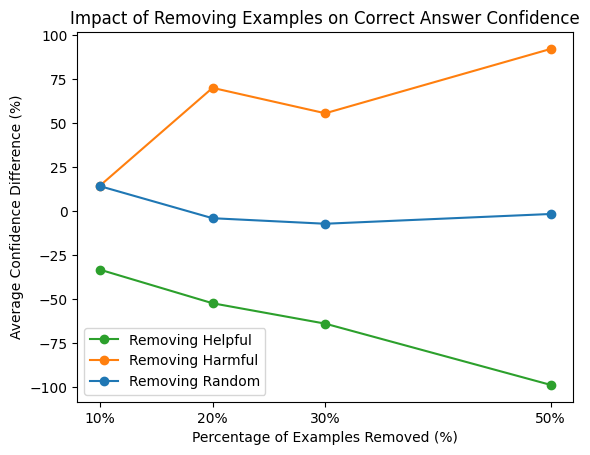

In [ ]:
dummy_results_dict = {
    "Helpful": {0.1: [-1, -2], 0.2: [-2, -3], 0.3: [-3, -4], 0.5: [-4, -5 ]},
    "Harmful": {0.1: [1, 2], 0.2: [2, 3], 0.3: [3, 4], 0.5: [4, 5]},
    "Random": {0.1: [0, 0], 0.2: [0, 0], 0.3: [0, 0], 0.5: [0, 0]},

}
fig, ax = plt.subplots()
colors = {"Helpful": 'tab:green', "Harmful": 'tab:orange',"Random": 'tab:blue'}

for key, value in results_dict.items():
    means = [np.mean(value[amount]) for amount in removed_amounts]
    ax.plot(removed_amounts, means, '-o', label=f"Removing {key}", color=colors[key])

ax.set_xlabel('Percentage of Examples Removed (%)')
ax.set_ylabel('Average Confidence Difference (%)')
ax.set_title('Impact of Removing Examples on Correct Answer Confidence')
ax.set_xticks(removed_amounts)
x_tick_labels = [f"{int(x*100)}%" for x in removed_amounts]
ax.set_xticklabels(x_tick_labels)
ax.legend()

plt.show()

### 3.3 Speed up the computations using kNN (10 points)
Your goal in this exercise is to speed-up the search for influential samples by only running the search on a subset of
the training set that is expected to be influential, as described [in section 3.2 of the paper](https://aclanthology.org/2021.emnlp-main.808.pdf).

We will do this by first running a k-nearest-neighbors search over the full dataset. Then we will compute the influences of the found neighbors by providing the ```knn_indices``` parameter to the ```compute_influences``` function. *Note that IHVP is still computed using the full training set.* This two-step procedure is expected to be faster while still finding the influential samples.

**Evaluation**

Please first copy the evaluation and result plotting from part 3.2 of this exercise sheet.
After implementing this part, plot the results.
You should see evaluation results comparable with full-search, but faster.
Record the time needed to run the evaluation and report the time comparison with the full search.

**How to search for neighbors**

To implement the nearest neighbor search we need to measure similarity between a test sample $x$ and a train
sample $x_j$. This is often done in machine learning by embedding both in a vector space and computing the distance
between the 2 vectors. A typical way to construct such embeddings is to take the last layer activations of our neural network. It is a common trick for deep metric learning: the assumption is that this way we obtain a good representation of our sample in a lower-dimensional space that preserves the semantics.

In our task, both $x$ and $x_j$ are sequences. Moreover, they have varying lengths, and a transformer model generates an embedding for each of the tokens at every layer.

The solution that is often adopted when one needs to embed a whole sentence by a BERT-type model is to take
the last layer embedding of the ```[CLS]``` token. You have already encountered this token in part 3.0 of this exercise.
If everything works correctly it should be the first token of the input. If you want to check for it, you can find the
id of this token by ```tokenizer.cls_token_id```.

In [ ]:
def embed_one_example(model, example):
    """Computes the last layer embedding of the [CLS] token for one example."""
    # TODO Your code here

    label_key = "labels" if "labels" in example else "label"

    example_formatted = {
        "input_ids": example["input_ids"].view(1, -1).to(DEVICE),
        "attention_mask": example["attention_mask"].view(1, -1).to(DEVICE),
        "labels" : example[label_key].view(1, -1).to(DEVICE),
    }

    # Use the model's final representation for the [CLS] token
    with torch.no_grad():
        embedding = model(
            **example_formatted,
            output_hidden_states=True
        ).hidden_states[-1][0, 0, :]
        # [0, 0, :] since [CLS] token is the first token of the first sequence

    # TODO End of your code
    return embedding

In [ ]:
def embed_training_dataset(model, tokenizer, train_dataset):
    """Create a list of embeddings for the training dataset.
    To be used for the kNN search.
    """
    data_collator = tf.DataCollatorWithPadding(tokenizer=tokenizer)
    train_dataloader = DataLoader(
        train_data, batch_size=1, sampler=SequentialSampler(train_dataset), collate_fn=data_collator
    )
    embeddings = []
    for train_example in train_dataloader:
        train_example.to(DEVICE)
        train_embd = embed_one_example(model, train_example)
        embeddings.append(train_embd)
    return embeddings

In [ ]:
def get_knn_indices(model, embedded_train_data, test_input, k=100):
    """Returns the set of indices of the k nearest neighbors of test_input in the training dataset."""
    # TODO Your code here

    # Embed the test example
    test_embedded = embed_one_example(model, test_input)

    # Compute the l2 distance between the test example and all training examples
    # You can do this with a for loop or use torch.cdist for a batch solution

    # Reshaping since torch.cdist calculates distances between rows:
    test_embeds = test_embedded.view(1, -1)
    train_embeds = torch.stack(embedded_train_data)

    distances = torch.cdist(
        test_embeds,
        train_embeds,
        p=2
    ).view(-1)

    # Sort the distances and take the k smallest ones
    knn_indices = torch.argsort(distances)[:k].tolist()

    # TODO End of your code
    return knn_indices

In [ ]:
# This block is adapted from part 3.2 to evaluate the kNN search with different k values

print("Training on original dataset")
trained_model = train_default_model_on_dataset(train_data)

k_values = [50, 100, 500, 750, 1066]
knn_results = dict()

removed_amounts = [0.1, 0.2, 0.3, 0.5]
test_example_indices = [x for x in range(10, 13)]

# Embed the whole training dataset to be used in kNN search
train_embed = embed_training_dataset(trained_model, tokenizer, train_data)

for k in k_values:
    print(f"Remove-and-Retrain with k={k}")

    knn_results[k] = {
        "Helpful": defaultdict(list),
        "Harmful": defaultdict(list),
        "Random": defaultdict(list),
    }
    # Measure the time
    time_start = time.time()  # Start timer

    for i, idx in enumerate(test_example_indices):
        print(f"Running test example {i} / {len(test_example_indices)}")
        test_example = {
            "input_ids": test_data["input_ids"][idx].view(1, -1).to(DEVICE),
            "attention_mask": test_data["attention_mask"][idx].view(1, -1).to(DEVICE),
            "labels" : test_data["label"][idx].view(1, -1).to(DEVICE),
        }

        # Compute confidence of correct answer before retraining
        c_pre = get_confidence_of_correct_answer(trained_model, test_example)

        # Compute influences for this test example, this time only with the kNN indices
        knn_indices = get_knn_indices(trained_model, train_embed, test_example, k=k)
        train_data_knn = train_data.select(knn_indices)
        # Get the complement of train_data_knn in train_data
        # This is needed to compute the indices of the removed samples
        knn_indices_complement = np.setdiff1d(np.arange(len(train_data)), knn_indices)
        train_data_knn_complement = train_data.select(knn_indices_complement)

        influences, s_test = compute_influences(
            model=trained_model,
            tokenizer=tokenizer,
            test_inputs=test_example,
            train_data=train_data_knn
        )

        # influences format: {train sample index: influence score}

        for key in knn_results[k]:  # Helpful, Harmful, Random
            for amount in removed_amounts:
                # Compute the indices of the train_data_knn to remove depending on key and amount

                remove_cnt = int(amount * len(influences))
                sorted_influences = sorted(influences.items(), key=lambda x: x[1])  # Sort the influences by increasing value
                # Note that higher influence implies higher loss, thus harmful examples
                if key == "Helpful":
                    # Choose the last (most helpful) remove_cnt samples
                    removed_indices = [x[0] for x in sorted_influences[-remove_cnt:]]
                elif key == "Harmful":
                    # Remove the first (most harmful) remove_cnt samples
                    removed_indices = [x[0] for x in sorted_influences[:remove_cnt]]
                else:  # Random
                    # Remove remove_cnt random samples
                    removed_indices = np.random.choice(len(influences), remove_cnt, replace=False)

                # Create a filtered training set
                # Indices to keep (formed as train_data indices - removed indices)
                keep_indices = np.setdiff1d(np.arange(len(train_data_knn)), removed_indices)

                filtered_train_data = train_data_knn.select(keep_indices)

                # Join with the complement of train_data_knn
                filtered_train_data = ds.concatenate_datasets(
                    [filtered_train_data, train_data_knn_complement]
                )

                # Retrain a model on this set
                retrained_model = train_default_model_on_dataset(filtered_train_data)

                # Compute the confidence of the correct answer
                c_post = get_confidence_of_correct_answer(retrained_model, test_example)

                # Calculate the confidence difference in percents and save it in the needed format
                confidence_diff = (c_post - c_pre) / c_pre * 100
                knn_results[k][key][amount].append(confidence_diff)

    # End timer & Measure
    time_end = time.time()
    print(f"Evaluation time: {time_end - time_start:.2f} seconds")

    print("\nResults:\n")
    for key in knn_results[k]:
        for amount in removed_amounts:
            print(f"{key}: Removed {amount} examples. Average confidence difference: {np.mean(knn_results[k][key][amount]):.2f}% (std: {np.std(knn_results[k][key][amount]):.2f})")

    print("\n")


Training on original dataset
Remove-and-Retrain with k=50
Running test example 0 / 3


100%|██████████| 50/50 [00:01<00:00, 28.15it/s]


Running test example 1 / 3


100%|██████████| 50/50 [00:02<00:00, 24.59it/s]


Running test example 2 / 3


100%|██████████| 50/50 [00:01<00:00, 28.13it/s]


Evaluation time: 457.97 seconds

Results:

Helpful: Removed 0.1 examples. Average confidence difference: -29.70% (std: 20.21)
Helpful: Removed 0.2 examples. Average confidence difference: -23.66% (std: 15.40)
Helpful: Removed 0.3 examples. Average confidence difference: -8.99% (std: 2.66)
Helpful: Removed 0.5 examples. Average confidence difference: -26.22% (std: 15.32)
Harmful: Removed 0.1 examples. Average confidence difference: -10.65% (std: 16.36)
Harmful: Removed 0.2 examples. Average confidence difference: 3.01% (std: 15.26)
Harmful: Removed 0.3 examples. Average confidence difference: 9.10% (std: 16.81)
Harmful: Removed 0.5 examples. Average confidence difference: 2.77% (std: 16.66)
Random: Removed 0.1 examples. Average confidence difference: -0.25% (std: 36.54)
Random: Removed 0.2 examples. Average confidence difference: -31.43% (std: 22.32)
Random: Removed 0.3 examples. Average confidence difference: -4.36% (std: 7.15)
Random: Removed 0.5 examples. Average confidence differenc

100%|██████████| 100/100 [00:03<00:00, 28.25it/s]


Running test example 1 / 3


100%|██████████| 100/100 [00:04<00:00, 24.88it/s]


Running test example 2 / 3


100%|██████████| 100/100 [00:03<00:00, 28.82it/s]


Evaluation time: 457.37 seconds

Results:

Helpful: Removed 0.1 examples. Average confidence difference: -29.20% (std: 27.85)
Helpful: Removed 0.2 examples. Average confidence difference: -25.27% (std: 14.76)
Helpful: Removed 0.3 examples. Average confidence difference: -26.88% (std: 22.23)
Helpful: Removed 0.5 examples. Average confidence difference: -32.73% (std: 20.55)
Harmful: Removed 0.1 examples. Average confidence difference: 8.99% (std: 11.67)
Harmful: Removed 0.2 examples. Average confidence difference: -23.57% (std: 14.12)
Harmful: Removed 0.3 examples. Average confidence difference: -15.70% (std: 23.55)
Harmful: Removed 0.5 examples. Average confidence difference: 3.44% (std: 39.56)
Random: Removed 0.1 examples. Average confidence difference: -14.68% (std: 16.53)
Random: Removed 0.2 examples. Average confidence difference: -6.16% (std: 3.45)
Random: Removed 0.3 examples. Average confidence difference: -15.16% (std: 8.95)
Random: Removed 0.5 examples. Average confidence diffe

100%|██████████| 500/500 [00:18<00:00, 27.20it/s]


Running test example 1 / 3


100%|██████████| 500/500 [00:17<00:00, 27.93it/s]


Running test example 2 / 3


100%|██████████| 500/500 [00:17<00:00, 27.96it/s]


Evaluation time: 475.35 seconds

Results:

Helpful: Removed 0.1 examples. Average confidence difference: -38.28% (std: 26.69)
Helpful: Removed 0.2 examples. Average confidence difference: -23.53% (std: 21.82)
Helpful: Removed 0.3 examples. Average confidence difference: -37.33% (std: 21.13)
Helpful: Removed 0.5 examples. Average confidence difference: -24.98% (std: 42.57)
Harmful: Removed 0.1 examples. Average confidence difference: 4.81% (std: 3.09)
Harmful: Removed 0.2 examples. Average confidence difference: 4.54% (std: 8.75)
Harmful: Removed 0.3 examples. Average confidence difference: 25.00% (std: 50.37)
Harmful: Removed 0.5 examples. Average confidence difference: 25.01% (std: 88.54)
Random: Removed 0.1 examples. Average confidence difference: -0.22% (std: 7.04)
Random: Removed 0.2 examples. Average confidence difference: 7.16% (std: 11.40)
Random: Removed 0.3 examples. Average confidence difference: -10.03% (std: 8.45)
Random: Removed 0.5 examples. Average confidence difference:

100%|██████████| 750/750 [00:26<00:00, 27.85it/s]


Running test example 1 / 3


100%|██████████| 750/750 [00:26<00:00, 27.86it/s]


Running test example 2 / 3


100%|██████████| 750/750 [00:27<00:00, 27.72it/s]


Evaluation time: 486.55 seconds

Results:

Helpful: Removed 0.1 examples. Average confidence difference: -45.49% (std: 33.22)
Helpful: Removed 0.2 examples. Average confidence difference: -54.86% (std: 37.98)
Helpful: Removed 0.3 examples. Average confidence difference: -48.74% (std: 35.98)
Helpful: Removed 0.5 examples. Average confidence difference: -72.58% (std: 19.46)
Harmful: Removed 0.1 examples. Average confidence difference: -8.55% (std: 28.83)
Harmful: Removed 0.2 examples. Average confidence difference: 1.79% (std: 10.16)
Harmful: Removed 0.3 examples. Average confidence difference: -2.33% (std: 28.01)
Harmful: Removed 0.5 examples. Average confidence difference: 16.06% (std: 16.80)
Random: Removed 0.1 examples. Average confidence difference: -28.19% (std: 27.89)
Random: Removed 0.2 examples. Average confidence difference: -18.04% (std: 11.82)
Random: Removed 0.3 examples. Average confidence difference: -25.70% (std: 12.70)
Random: Removed 0.5 examples. Average confidence dif

100%|██████████| 1066/1066 [00:38<00:00, 27.59it/s]


Running test example 1 / 3


100%|██████████| 1066/1066 [00:37<00:00, 28.30it/s]


Running test example 2 / 3


100%|██████████| 1066/1066 [00:38<00:00, 27.96it/s]


Evaluation time: 503.99 seconds

Results:

Helpful: Removed 0.1 examples. Average confidence difference: -13.08% (std: 11.58)
Helpful: Removed 0.2 examples. Average confidence difference: -59.21% (std: 39.69)
Helpful: Removed 0.3 examples. Average confidence difference: -67.03% (std: 25.18)
Helpful: Removed 0.5 examples. Average confidence difference: -98.75% (std: 0.35)
Harmful: Removed 0.1 examples. Average confidence difference: -0.90% (std: 5.66)
Harmful: Removed 0.2 examples. Average confidence difference: 37.33% (std: 46.11)
Harmful: Removed 0.3 examples. Average confidence difference: 21.91% (std: 25.73)
Harmful: Removed 0.5 examples. Average confidence difference: 67.09% (std: 79.04)
Random: Removed 0.1 examples. Average confidence difference: -19.63% (std: 25.51)
Random: Removed 0.2 examples. Average confidence difference: -22.65% (std: 18.87)
Random: Removed 0.3 examples. Average confidence difference: -25.46% (std: 10.95)
Random: Removed 0.5 examples. Average confidence diff

#### Plot the evaluation results

In [ ]:
# This block is adapted from part 3.2

def plot_knn_result_dict(results_dict, k):
  fig, ax = plt.subplots()
  colors = {"Helpful": 'tab:green', "Harmful": 'tab:orange',"Random": 'tab:blue'}

  for key, value in results_dict.items():
      means = [np.mean(value[amount]) for amount in removed_amounts]
      ax.plot(removed_amounts, means, '-o', label=f"Removing {key}", color=colors[key])

  ax.set_xlabel('Percentage of Examples Removed (%)')
  ax.set_ylabel('Average Confidence Difference (%)')
  ax.set_title(f'Impact of Removing Examples on Correct Answer Confidence (k = {k})')
  ax.set_xticks(removed_amounts)
  x_tick_labels = [f"{int(x*100)}%" for x in removed_amounts]
  ax.set_xticklabels(x_tick_labels)
  ax.legend()

  plt.show()

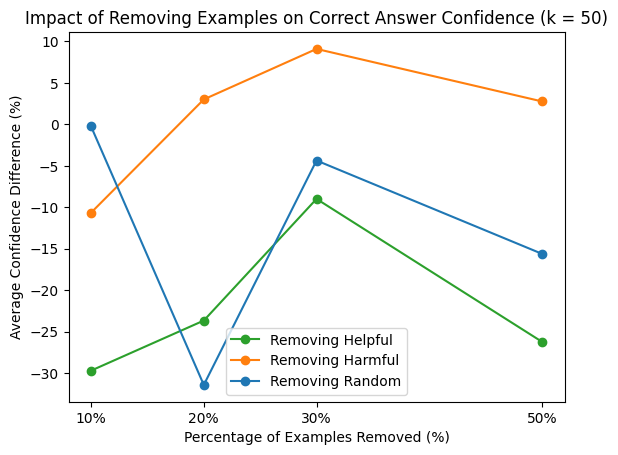

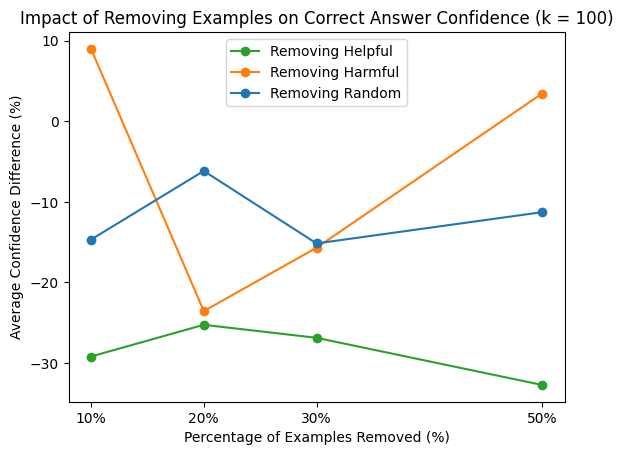

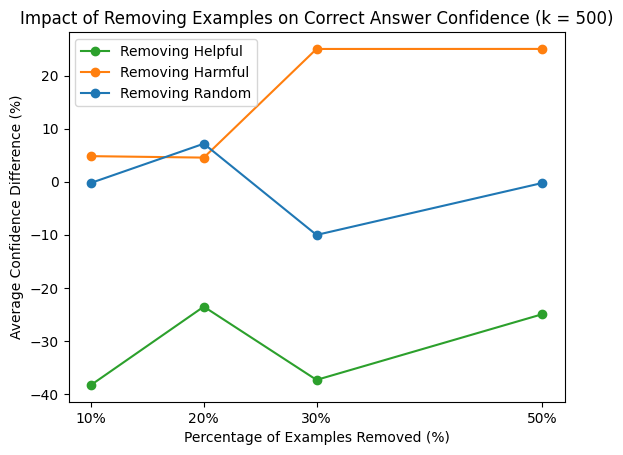

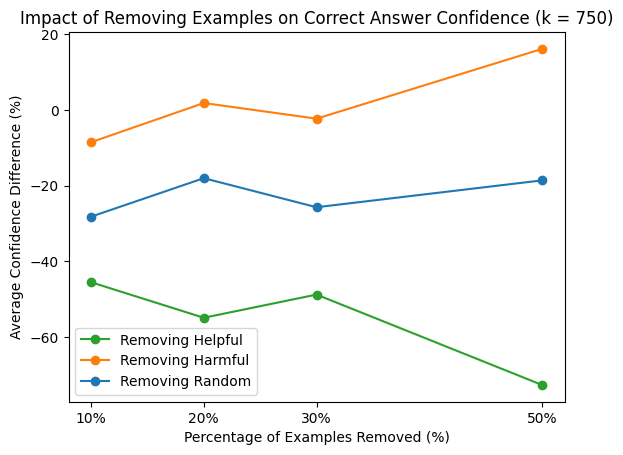

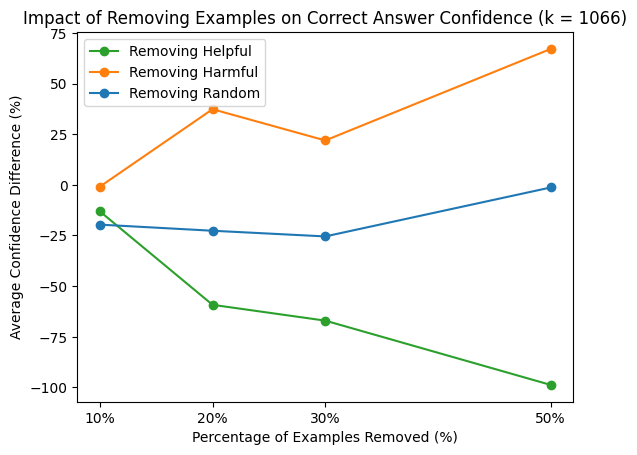

In [ ]:
for k in k_values:
  plot_knn_result_dict(knn_results[k], k)

### 3.4 Discussion (4 points)

- How big was the speed-up that you observed? Explain your observations.
- Does this type of evaluation make sense to you? What are its pros and cons?
- In this type of soundness evaluation we use random removal as a baseline. What could some other reasonable baselines be?
- Try to come up with 2 practical applications of Training Data Attribution not mentioned in the lecture and explain why they are useful. (Citing existing work not cited in the lecture is welcome.)
- *(No points, feedback question)* What is your personal opinion on TDA? Do you see an application for them in your own projects? If yes - how, and if not - why? How would you compare them with feature-based attribution methods?

* **How big was the speed-up that you observed? Explain your observations.**

  The KNN search with k=100 brought the influence function computation time to around 3 seconds down from around 37 seconds, greatly speeding up the process. The speed-up is expected since the KNN search reduces the number of training samples to be considered. Even though the new index calculations added some overhead, the total retraining times were also reduced from around 497 seconds to around 457 seconds.

  To observe the correlation of k with speed-up and performance better, we reran the experiment with k=50, 100, 500, 750, and 1066. It can be seen from the training results above that influence function computation times increase linearly as k increases, since the number of training samples used in influence calculation increases with k.

* **Does this type of evaluation make sense to you? What are its pros and cons?**

  The influence function computation can be greatly sped up with KNN, especially on large-scaled datasets. This method is expected to compromise accuracy in finding harmful and helpful examples, in exchange for computation speed. A smaller drop in accuracy could be expected in larger datasets, where only few examples are expected to be correlated with a given test example.

  However, in small scaled datasets like ours, considering only a smaller subset might inevitably introduce an accuracy drop. As can be seen from our experiments with different k values, even removing helpful and harmful examples generally decrease or increase confidence as expected, smaller k values have much more significant fluctuations. This can be interpreted as a result of unintendedly removing helpful examples along with harmful examples (or vice versa).

  The random removal baseline fluctuating more with lesser k values also confirms that the nearest k examples contain most of both the most helpful and harmful examples, as random removal in this subset yields more unpredictable results compared to larger ones.

  Therefore, in summary, while the biggest advantage of performing KNN search is the increased speed performance in influence function calculations, it can also decrease the success of the influence function significantly, most likely worse in smaller datasets.  

* **In this type of soundness evaluation we use random removal as a baseline. What could some other reasonable baselines be?**

  Another reasonable baseline could be removing the most influential examples in general, including both helpful and harmful examples, preferably in the same proportion. This could be done by sorting the influence scores and removing the top/bottom k% of the examples. This could provide intuition on how well the influence function differentiates between helpful and harmful examples.

* **Try to come up with 2 practical applications of Training Data Attribution not mentioned in the lecture and explain why they are useful. (Citing existing work not cited in the lecture is welcome.)**

  * Since Training Data Attribution reveals the most helpful and harmful samples in the training set for a given example, these examples can be used as a guide in training dataset augmentation. Especially in smaller and/or imbalanced datasets, if a model struggles on a task for specific types of input, augmenting the training dataset addressing its most influential samples can help the model generalize better on such examples. This can be achieved by generating new examples of the influential kind, creating new influential examples with data transformations, or if the helpful examples are not harmful for other input types, simply multiplying the helpful examples. Also, examples that are not very influential on most inputs can be reduced in count.

  * Influential samples obtained with Training Data Attribution can be used to train a smaller model. This new model would be expected to have comparable generalization performance, effectively resulting in a type of model compression. This can be used to reduce the size of the model and the inference time without compromising much accuracy on the intended task.

* **What is your personal opinion on TDA? Do you see an application for them in your own projects? If yes - how, and if not - why? How would you compare them with feature-based attribution methods?**

  Training Data Attribution is an important aspect of explainable AI. Especially considering the increasing security and privacy concerns in large scaled models' training sets, being able to address the training examples a model refers to becomes a necessity. I think the ability to explicitly refer to specific training examples is the major advantage of TDA over feature-based attribution. Some widely used model architectures, such as transformers, do not have explainable parameters, thus methods such as CAM do not yield useful results. Attributing to training samples instead render making changes in the training phase more intuitive.

  However, the usability of TDA still depends on the task. For example, if a classification model is biased towards a specific class, TDA might not be able to successfully capture the actual most influential samples. In such cases, feature-based attribution methods might be more useful. Also, TDA is still a relatively new field, and there are open questions to be answered, as well as limitations to overcome. For example, the influence function calculation assumes the loss is convex around the point of convergence$\,^{[1]}$, which might cause instability in some cases. Thus the results might not be always reliable.

  In summary, I think TDA is a promising method, but it still requires research to be more reliable and usable in practice.

[1] Section 4.2 in: Pang Wei Koh and Percy Liang. 2017. Understanding black-box predictions via influence functions. In Proceedings of the 34th International Conference on Machine Learning-Volume 70, pages 1885-1894. JMLR. org.

## **4. (Bonus) Short Paper Review** (10pts)

In this bonus task, your task is to write a short review for **one** of the following papers:
- [Analyzing Chain-of-Thought Prompting in Large Language Models via
Gradient-based Feature Attributions](https://arxiv.org/abs/2307.13339).
- [Driving with LLMs: Fusing Object-Level Vector Modality for Explainable Autonomous Driving](https://arxiv.org/pdf/2310.01957.pdf)
- [On Gradient-like Explanation under a Black-box Setting: When Black-box Explanations Become as Good as White-box](https://arxiv.org/pdf/2308.09381.pdf)

Below is are a few questions to consider in a review as inspiration (Slightly adapted from [ICML'22 reviewer guide](https://drive.google.com/file/d/15hPTA64h31ShaoybLWeU3moZan7zVbr_/view))
- A concise summary of the paper
    - What problem is addressed in the paper? (1.1)
    - Why does the problem matter?  (1.2)
    - What is the key to the solution? What is the main contribution? (1.3)
    - Do the experiments sufficiently support the claims? (1.4)
- A clear statement of strengths and weaknesses
    - What are the key contributions and why do they matter? (2.1)
    - What aspects of the paper most need improvement? (2.2)
- A comprehensive check of potential fundamental flaws in the paper
    - Are the assumptions and theories (mathematically) sound? (3.1)
    - Are the experiments scientifically sound and valid?  (3.2)
    - Is the problem addressed trivial? (3.3)

When reviewing, adress the paper from the angle of Trustworthy AI, specifically focusing on the topic of Explainability.

Note: Responses to the questions mentioned above are indicated by the corresponding question numbers.


## On Gradient-like Explanation under a Black-box Setting: When Black-box Explanations Become as Good as White-box

The paper addresses challenges related to the impracticality of requiring unrestricted access to the target system for gradient analysis, especially in the context of white-box solutions **(1.1)**. It introduces Gradient Estimation-based EXplanation (GEEX) as a method to overcome these limitations and enhance applicability to diverse models without full access assumptions, in contrast to white-box solutions, which generally require modifications for models with different architecture. The problem matters because white-box solutions hinders practical applications by requiring full access for gradient analysis, posing security risks **(1.2)**. While the impracticality of white-box methods is a longstanding issue, the computational cost associated with black-box methods has led researchers to prioritize investments in white-box methods over black-box alternatives.

The GEEX method employs natural evolution strategies (1), which are heuristic search procedures inspired by natural evolution. During each iteration (generation), a population of parameter vectors undergoes perturbations (mutations), and their fitness is evaluated based on an objective function. The parameter vectors with the highest scores are then combined to create the population for the next generation. This process repeats until the objective is fully optimized (2). Main contribution of the authors is to propose an original black-box explanation method (and its two different derivations GERS and iGEEX where the latter is a path method that satisfies the four axioms all at once (4)) based on the estimation of gradients via natural evolution strategies. **(1.3)** To generate a sample set $\{z_1, z_2, ..., z_n\}$, they employ noise sampling and implement mask resizing (5) to address issues related to noisy estimation, scaling effects, and vanishing gradient problems.  

Authors claim that the proposed method outperforms state-of-the-art black-box methods and achieve competitive performance compared to the ones with full access, with a focus on image data. Their assertion is backed by both the distance results and the outcomes of the evaluation via deletion. Despite a provided link to the code, (as of 17/11/23) it is currently unavailable. Consequently, reproducing the experimental results appears challenging without implementing the GEEX method independently from scratch. **(1.4)**

Key contributions in this paper include development of a new black-box explanation method called Gradient Estimation-based EXplanation, refinement of it to integrated GEEX, that satisfies sensitivity, insensitivity, implementation invariance, (and linearity when the loss is a linear function of model outcome), and application of mask resizing to solve the limitations of naive pixel-wise sampling approach. Following these developments, the authors conduct experiments to compare the performance of their algorithms with state-of-the-art black-box methods such as RISE and LIME, as well as state-of-the-art white-box methods including SmoothGrad and IG. According to a survey conducted by Francesco _et al_ (6), RISE seems to outperform other methods in the majority of the conducted experiments for generating saliency maps. Therefore, it is reasonable to consider it as the preferred choice or competitor. **(2.1)**

The authors assert that their method is versatile and can be applied to diverse data forms, including tabular and textual data. To strengthen this claim and provide more compelling evidence, it would be beneficial to conduct experiments in these settings. This would allow for a more robust evaluation, supporting the assertion that GEEX surpasses other black-box explanation methods. **(2.2)**

The paper addresses the absence of an explicitly given pixel value distribution by choosing $\pi(z | x)$ as a Gaussian distribution $\mathcal{N}(x, σ)$, where $σ$ is a predefined hyperparameter. The target probability distribution is a uniform distribution over $k$ classes, facilitating gradient computation for effective classification. The reason why such target probability is chosen is to capture the gradients towards the minimization of useful information so that the model do not strongly bound to the target class. These coherent assumptions contribute to the model's strong performance on test sets, though a minor notation error is noted, as highlighted in the Errata section. **(3.1)**

In the experiments, they used three datasets, two of which consist of grayscale images and the other has full-colored images. Three different variations of GEEX are used: GEEX, GERS (resizing) and iGEEX (integrated GEEX). Different input sizes are selected on purpose to show the impact of the scaling effect on
explanation quality. For comparison, SmoothGrad and IG are used as white-box methods; LIME and RISE are used as black-box methods. Competitors are compared with each other according two evaluation criteria: distance between the explanations based on the $L_1$ norms, and evaluation via deletion (Samek _et al._ 2016) with normalized AOPC (area over perturbation curve). During the experiments, training set are used for training the classifiers and test set is used only for evaluation. The supplementary material includes an analysis of the impact of hyperparameter modifications. In short, all experiments and evaluation metrics sound valid. **(3.2)**

The issue tackled in this paper is far from simple. Adding explanation methods to a system without access to its gradients poses a considerable challenge, and the existing approaches don't appear to match up well against white-box solutions. **(3.3)**


 ### References
 1.  Wierstra, D.; Schaul, T.; Glasmachers, T.; Sun, Y.; Peters, J.; and Schmidhuber, J. 2014. Natural evolution strategies. The Journal of Machine Learning Research 15(1):949–980.
 2. Salimans, T., Ho, J., Chen, X., Sidor, S., & Sutskever, I. (2017). Evolution Strategies as a Scalable Alternative to Reinforcement Learning. arXiv preprint arXiv:1703.03864.
 3. Samek, W.; Binder, A.; Montavon, G.; Lapuschkin, S.; and Muller, K.-R. 2016. Evaluating the visualization of what a deep neural network has learned. IEEE transactions on neural networks and learning systems 28(11):2660–2673.
 4. Sundararajan, M.; Taly, A.; and Yan, Q. 2017. Axiomatic attribution for deep networks. In International conference on machine learning, 3319–3328. PMLR.
 5. Petsiuk, V., Das, A., & Saenko, K. (2018). RISE: Randomized Input Sampling for Explanation of Black-box Models. CoRR, abs/1806.07421. http://arxiv.org/abs/1806.07421
 6. Bodria, F., Giannotti, F., Guidotti, R., Naretto, F., Pedreschi, D., & Rinzivillo, S. (2021). Benchmarking and Survey of Explanation Methods for Black Box Models. arXiv preprint arXiv:2102.13076.


## Errata
### Expectation over Sample Instances
We've noticed a slight error in the paper's notation. Let's start fresh to ensure clarity. In the work authored by Saliman _et al._ (2), NES algorithms are symbolically expressed by the utilization of the ensuing variables and equations:
* $\theta$ = parameters
* $F(\theta)$ = objective function
* $p_{\psi}(\theta)$  = population distribution over parameters $\theta$ (and itself parametrized by $\psi$)
* The average value of the objective function across the samples coming from the population distribution: $\mathbb{E}_{\theta \sim p_{\psi}} F(\theta)$
* We want to find the parameters $\psi$ to maximize the objective value, therefore we use the following gradients:
$$ \nabla_\psi \; \mathbb{E}_{\theta \sim p_{\psi}} F(\theta) $$

Now, with that in mind, let's analyze the notation in this paper:
* $x$ = parameters
* $z$ = instance sampled from the given distribution
* $f(z)$ = probability distribution predicted by the model
* $\mathcal{L}(f(z))$ = objective function
* $\pi_x(z)$  = search distribution over $z$ (and itself parametrized by $x$)
* The average value of the objective function across the samples coming from the population distribution: $J(x) = \mathbb{E}_{z \sim \pi_x} \mathcal{L}(f(z))$
* We want to find the parameters $\psi$ to maximize the objective value, therefore we use the following gradients:
$$ \nabla_x \; \mathbb{E}_{z \sim \pi_x} \mathcal{L}(f(z)) $$


According to the paper: $J(x) = \mathbb{E}_{x} \; \mathcal{L}(f(z))$  \\
In Section 3 of the paper, they've erroneously denoted $J(x)$ with an expectation over samples $x$ instead of $z$. But the rest of the equations are correct.

---

* While it's not incorrect, they represented the target (ground-truth) probability distribution as $\hat{y}$ instead of $y$. This choice introduces a slight confusion, as conventionally in the literature, $\hat{y}$ typically denotes the predicted probability, while $y$ represents the target probability.
* Moreover, there's a misspelling of "prediction" in the experiment results provided in the Effect of Hyperparameters subsection.